In [1]:
# Create annotation tiff stacks from input json file 

In [4]:
import numpy as np
import json

import os
from at_synapse_detection import synaptogram
import matplotlib.pyplot as plt
from scipy import misc


In [3]:
data = json.load(open('json_annotations/m247514_Site3Annotation_MN_global_v2.json'))
arealists = data['area_lists']

In [11]:
# ROW, COL, Z
labelvol = np.zeros((441, 420, 50))

In [16]:
for synapse in arealists: 
    
    synapseOutlinesDict = synaptogram.getAnnotationOutlines(synapse)
    synapseOutlinesDict = synaptogram.transformSynapseOutlinesDict(synapseOutlinesDict)

    subAreas = synapseOutlinesDict['subAreas']
    zInds = synapseOutlinesDict['zInds']
    
    for n in range(0, len(zInds)): 
        zInd = int(zInds[n])
        subareaOutline = subAreas[n] 
        xcolumns = np.array(subareaOutline[0])
        yrows = np.array(subareaOutline[1])

        rows = []
        for n in range(0, len(yrows)): 
            rows.append(int(np.round(yrows[n])))

        cols = [] 
        for n in range(0, len(xcolumns)): 
            cols.append(int(np.round(xcolumns[n])))

        labelvol[rows, cols, zInd] = 1

<IPython.core.display.Javascript object>


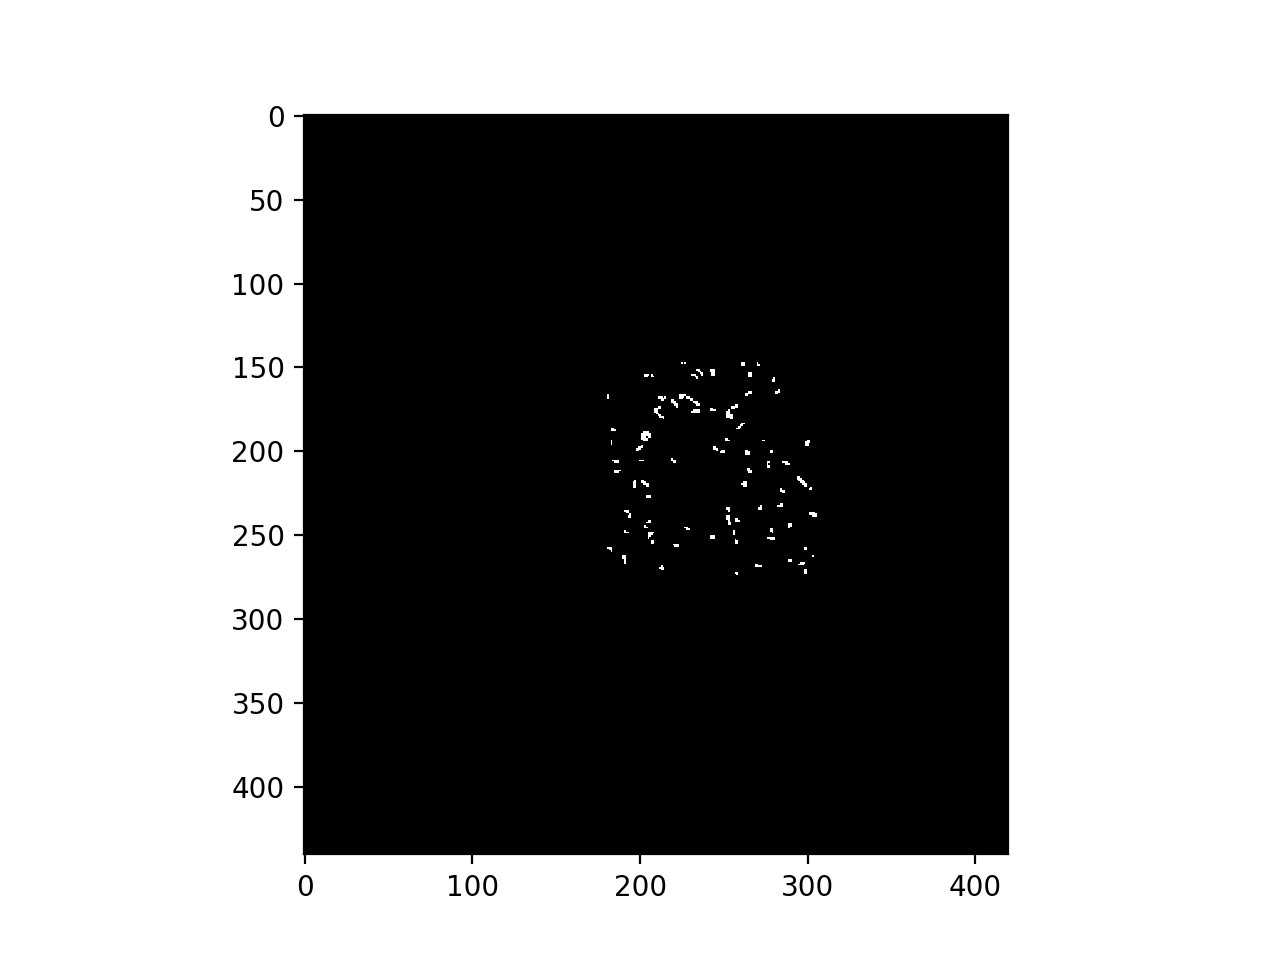

In [17]:
%matplotlib notebook

plt.imshow(labelvol[:, :, 46], cmap='gray')

In [18]:
folderpath = '/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/labels'

In [22]:
for z in range(0, labelvol.shape[2]): 
    fn = os.path.join(folderpath, str(z).zfill(5))
    fn = fn + '.tiff'
    misc.imsave(fn, labelvol[:, :, z])
    print(fn)

/Users/anish/anaconda3/envs/synapse_analysis/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/labels/00000.tiff
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/labels/00001.tiff
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/labels/00002.tiff
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/labels/00003.tiff
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/labels/00004.tiff
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/labels/00005.tiff
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/labels/00006.tiff
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/labels/00007.tiff
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/labels/00008.tiff
/Users/anish/Documents/Connectome/Synaptome-Duke/data/collman17/Site3Align2Stacks/labels/00009.tiff
